# Datasets
**Training dataset:**

1.   Metabric Breast Cancer dataset
2.   Duke university Breast Cancer dataset
3.   MSK Breast Cancer dataset



**Validation dataset:** Real patients from Baheya hospital



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/content/merged_data2.csv')

In [3]:
Baheya_data = pd.read_csv('/content/merged_baheya.csv')

## **Shuffle**

In [4]:
import pandas as pd
import random

def shuffle_csv_file(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Shuffle the DataFrame
    df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Save the shuffled DataFrame back to the CSV file
    df_shuffled.to_csv(file_path, index=False)


csv_file_path = '/content/merged_data2.csv'
shuffle_csv_file(csv_file_path)


In [5]:
data = pd.read_csv('/content/merged_data2.csv')

# Train

### Preprocessing

**1. Split dataset into features and target**






In [6]:
X = data.drop('Recurrence Free Status',axis=1)
y = data['Recurrence Free Status']

**2. Perform one-hot encoding**




In [7]:
X = pd.get_dummies(X, columns=['Menopausal Status','Tumor Size','Lymph Node Status',
                               'Tumor Grade', 'Histological Type','ER', 'PR',
                               'HER2','Tumor Location','Overall Survival Status'])

**3. Encode labels in target column**


In [8]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

**4. Train Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

**5. Min Max Scaler**

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])
X_train_scaled = scaler.transform(X_train[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])
X_test_scaled = scaler.transform(X_test[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

### Models

**1. Random Forest Model**

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

start_time = time.time()

# Create and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=1)
clf.fit(X_train_scaled, y_train_encoded)

# Predict on the training set
y_pred = clf.predict(X_train_scaled)

# Inverse transform to get original labels
y_pred_original = label_encoder.inverse_transform(y_pred)
y_train_original = label_encoder.inverse_transform(y_train_encoded)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 64.83 seconds


In [12]:
cv_scores = cross_val_score(clf, X_train_scaled, y_train_original, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9212828  0.89212828 0.89650146 0.89650146 0.89650146]
Mean Accuracy: 0.9005830903790087


In [13]:
train_accuracy_rf = accuracy_score(y_train_original, y_pred_original)
train_report = classification_report(y_train_original, y_pred_original)

print("Training Set Accuracy:", train_accuracy_rf)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.978134110787172
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1792
           1       0.98      0.97      0.98      1638

    accuracy                           0.98      3430
   macro avg       0.98      0.98      0.98      3430
weighted avg       0.98      0.98      0.98      3430



In [14]:
import joblib
from sklearn.ensemble import RandomForestClassifier

#joblib.dump(clf, "/content/drive/MyDrive/Models/RF_model.joblib")
joblib.dump(clf, "/content/RF_model.joblib")

['/content/RF_model.joblib']



---



**2. XGBoost Model**

In [15]:
pip install xgboost

In [16]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import time

start_time = time.time()

xgb = xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 0.16 seconds


In [17]:
cv_scores = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93877551 0.9154519  0.91982507 0.91690962 0.91107872]
Mean Accuracy: 0.9204081632653061


In [18]:
train_accuracy_xgb = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy_xgb)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9446064139941691
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1792
           1       0.97      0.92      0.94      1638

    accuracy                           0.94      3430
   macro avg       0.95      0.94      0.94      3430
weighted avg       0.95      0.94      0.94      3430



In [19]:
import joblib
from sklearn.ensemble import RandomForestClassifier

#joblib.dump(xgb, "/content/drive/MyDrive/Models/xgb_model.joblib")
joblib.dump(xgb, "/content/xgb_model.joblib")

['/content/xgb_model.joblib']



---



**3. Support Vector Machine Model**

In [20]:
from sklearn.svm import SVC
import time

start_time = time.time()

SVM = SVC(kernel='rbf', C=10000, gamma=100)
SVM.fit(X_train_scaled, y_train)

y_pred = SVM.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 72.74 seconds


In [21]:
cv_scores = cross_val_score(SVM, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93586006 0.91107872 0.9154519  0.91253644 0.93148688]
Mean Accuracy: 0.9212827988338192


In [22]:
train_accuracy_svm = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy_svm)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9521865889212828
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1792
           1       0.98      0.92      0.95      1638

    accuracy                           0.95      3430
   macro avg       0.95      0.95      0.95      3430
weighted avg       0.95      0.95      0.95      3430



In [23]:
import joblib
from sklearn.ensemble import RandomForestClassifier

#joblib.dump(SVM, "/content/drive/MyDrive/Models/SVM_model.joblib")
joblib.dump(SVM, "/content/SVM_model.joblib")

['/content/SVM_model.joblib']



---



**4. KNN Model**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_train_scaled)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Model training took 0.17 seconds


In [25]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.91836735 0.89358601 0.90379009 0.89212828 0.89941691]
Mean Accuracy: 0.9014577259475217


In [26]:
train_accuracy_knn = accuracy_score(y_train, y_pred)
train_report = classification_report(y_train, y_pred)

print("Training Set Accuracy:", train_accuracy_knn)
print("Training Set Classification Report:\n", train_report)

Training Set Accuracy: 0.9384839650145773
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1792
           1       0.96      0.91      0.93      1638

    accuracy                           0.94      3430
   macro avg       0.94      0.94      0.94      3430
weighted avg       0.94      0.94      0.94      3430



In [27]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(knn, "/content/knn_model.joblib")
#joblib.dump(knn, "/content/drive/MyDrive/Models/knn_model.joblib")

['/content/knn_model.joblib']



---



**5. NN Model**

In [28]:
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time

start_time = time.time()

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))    # To capture non linear complex relations
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.002), metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64)

end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time
print(f"Model training took {execution_time:.2f} seconds")

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.7577
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.7843
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8175
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8373
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3620 - accuracy: 0.8373
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8650
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8545
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8761
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3156 - accuracy: 0.8653
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8851
Epoch 11/50
54/54 [

In [29]:
y_pred_prob = model.predict(X_train_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

train_loss, train_accuracy_nn = model.evaluate(X_train_scaled, y_train)
train_report = classification_report(y_train, y_pred)

print(f"Train Loss: {train_loss:.4f}")
print("Training Set Accuracy:", train_accuracy_nn)
print("Training Set Classification Report:\n", train_report)

108/108 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9076
Train Loss: 0.2299
Training Set Accuracy: 0.9075801968574524
Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.91      1792
           1       0.94      0.87      0.90      1638

    accuracy                           0.91      3430
   macro avg       0.91      0.91      0.91      3430
weighted avg       0.91      0.91      0.91      3430



In [30]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(model, "/content/NN_model.joblib")
#joblib.dump(model, "/content/drive/MyDrive/Models/NN_model.joblib")

['/content/NN_model.joblib']



---



---



# Test

**1. Random Forest Model**

In [31]:
import joblib
clf = joblib.load("/content/RF_model.joblib")
#clf = joblib.load("/content/drive/MyDrive/Models/RF_model.joblib")

In [32]:
y_pred = clf.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy_rf1 = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy_rf1)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.9102651257647859
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       768
           1       0.92      0.89      0.90       703

    accuracy                           0.91      1471
   macro avg       0.91      0.91      0.91      1471
weighted avg       0.91      0.91      0.91      1471



**2. XGBoost Model**

In [33]:
xgb = joblib.load("/content/xgb_model.joblib")
#xgb = joblib.load("/content/drive/MyDrive/Models/xgb_model.joblib")

In [34]:
y_pred = xgb.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy_xgb1 = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy_xgb1)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.9136641740312712
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       768
           1       0.94      0.88      0.91       703

    accuracy                           0.91      1471
   macro avg       0.92      0.91      0.91      1471
weighted avg       0.91      0.91      0.91      1471



**3. Support Vector Machine**

In [35]:
SVM = joblib.load("/content/SVM_model.joblib")
#SVM = joblib.load("/content/drive/MyDrive/Models/SVM_model.joblib")

In [36]:
y_pred = SVM.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy_svm1 = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy_svm1)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.9150237933378654
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       768
           1       0.94      0.88      0.91       703

    accuracy                           0.92      1471
   macro avg       0.92      0.91      0.91      1471
weighted avg       0.92      0.92      0.91      1471



**4.KNN Model**

In [37]:
knn = joblib.load("/content/knn_model.joblib")
#knn = joblib.load("/content/drive/MyDrive/Models/knn_model.joblib")

In [38]:
y_pred = knn.predict(X_test_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

test_accuracy_knn1 = accuracy_score(y_test_original, y_pred_original)
test_report = classification_report(y_test_original, y_pred_original)

print("Test Set Accuracy:", test_accuracy_knn1)
print("Test Set Classification Report:\n", test_report)

Test Set Accuracy: 0.9048266485384092
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       768
           1       0.93      0.86      0.90       703

    accuracy                           0.90      1471
   macro avg       0.91      0.90      0.90      1471
weighted avg       0.91      0.90      0.90      1471



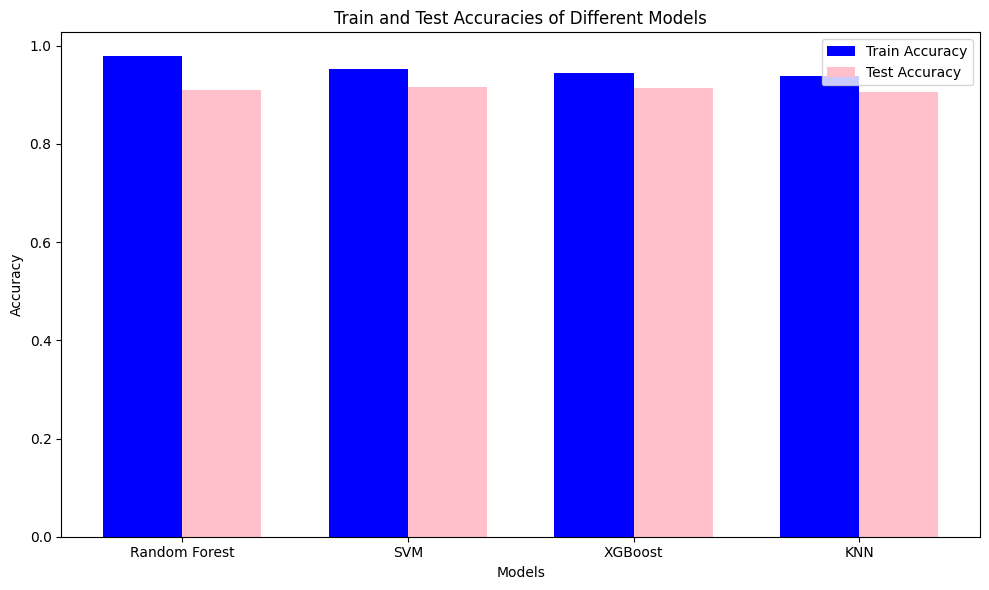

In [39]:
import matplotlib.pyplot as plt

# Train accuracies
train_accuracies = [train_accuracy_rf, train_accuracy_svm, train_accuracy_xgb, train_accuracy_knn]

# Test accuracies
test_accuracies = [test_accuracy_rf1, test_accuracy_svm1, test_accuracy_xgb1, test_accuracy_knn1]

# Model names
models = ['Random Forest', 'SVM', 'XGBoost', 'KNN']

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Train accuracies
plt.bar(models, train_accuracies, bar_width, label='Train Accuracy', color='blue')

# Test accuracies
plt.bar([x + bar_width for x in range(len(models))], test_accuracies, bar_width, label='Test Accuracy', color='pink')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies of Different Models')
plt.xticks([x + bar_width / 2 for x in range(len(models))], models)
plt.legend()
plt.tight_layout()
plt.show()




---



---



# Validation

### Preprocessing

**1. Split dataset into features and target**

In [40]:
X_val = Baheya_data.drop('Recurrence Free Status', axis=1)
y_val = Baheya_data['Recurrence Free Status']

**2. Perform one-hot encoding**

In [41]:
categorical_columns = ['Menopausal Status','Tumor Size','Lymph Node Status',
                               'Tumor Grade', 'Histological Type','ER', 'PR',
                               'HER2','Tumor Location','Overall Survival Status']

X_val = pd.get_dummies(X_val, columns=categorical_columns)

**3. Encode labels in target column**

In [42]:
label_encoder = preprocessing.LabelEncoder()
y_val = label_encoder.fit_transform(y_val)

**4. Min Max Scaler**

In [43]:
X_val_scaled = scaler.transform(X_val[['Overall Survival Status (Month)', 'Recurrence Free Status (Month)']])

### Models

**1. Random Forest Model**

In [67]:
y_pred_RF = clf.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_RF)
y_val_original = label_encoder.inverse_transform(y_val)

In [68]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.864
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.86      0.89      0.87       198
    Recurred       0.88      0.83      0.85       177

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



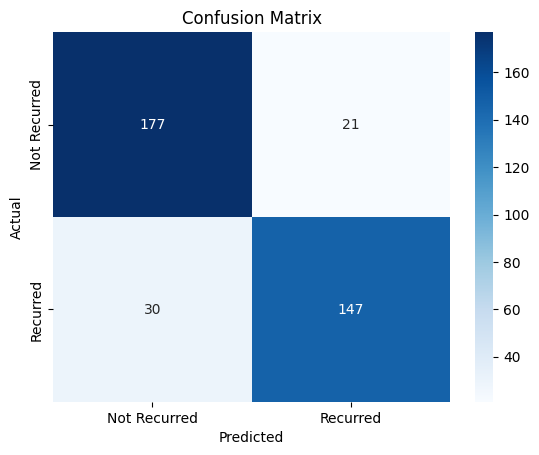

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()


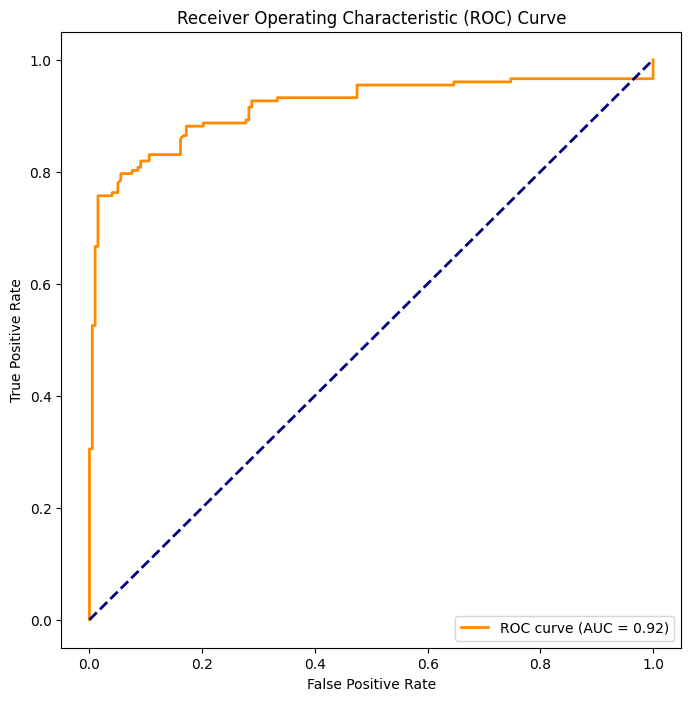

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = clf.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**2. XGBoost Model**

In [71]:
y_pred_XGB = xgb.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_XGB)
y_val_original = label_encoder.inverse_transform(y_val)

In [72]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.84
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.83      0.87      0.85       198
    Recurred       0.85      0.80      0.83       177

    accuracy                           0.84       375
   macro avg       0.84      0.84      0.84       375
weighted avg       0.84      0.84      0.84       375



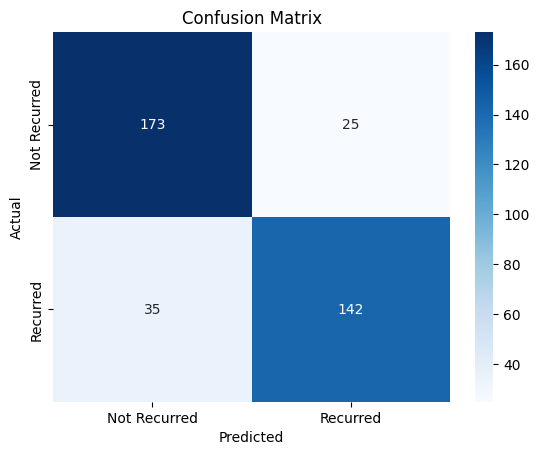

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

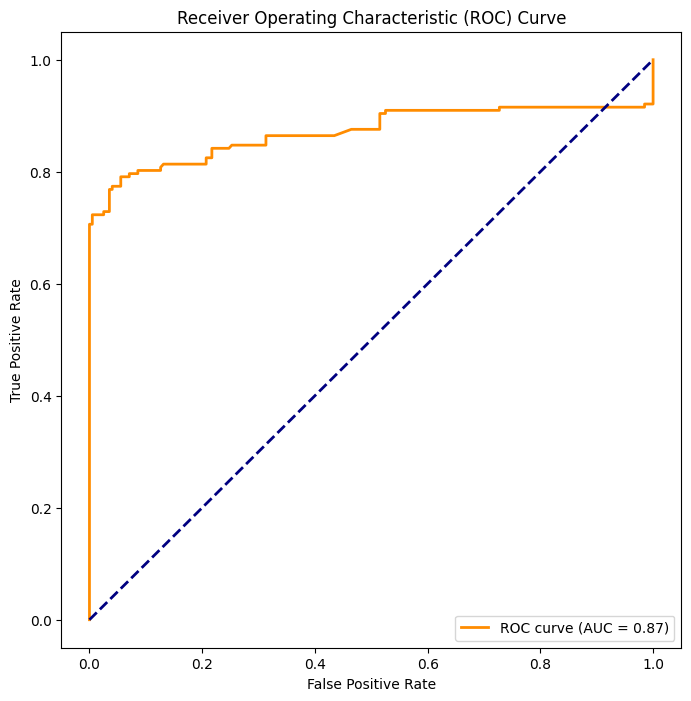

In [74]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = xgb.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**3. Support Vector Machine Model**

In [75]:
y_pred_SVM = SVM.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_SVM)
y_val_original = label_encoder.inverse_transform(y_val)

In [76]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.9306666666666666
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.89      0.98      0.94       198
    Recurred       0.98      0.87      0.92       177

    accuracy                           0.93       375
   macro avg       0.94      0.93      0.93       375
weighted avg       0.94      0.93      0.93       375



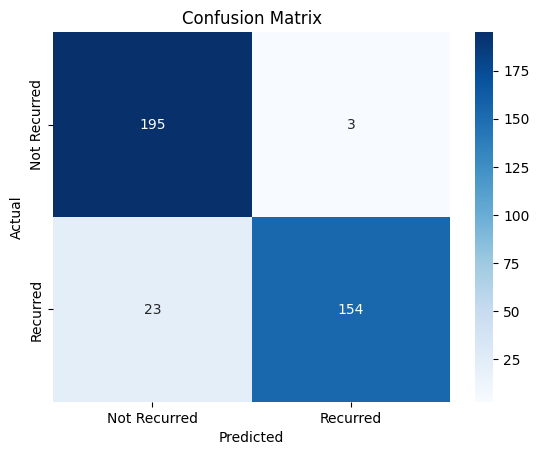

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

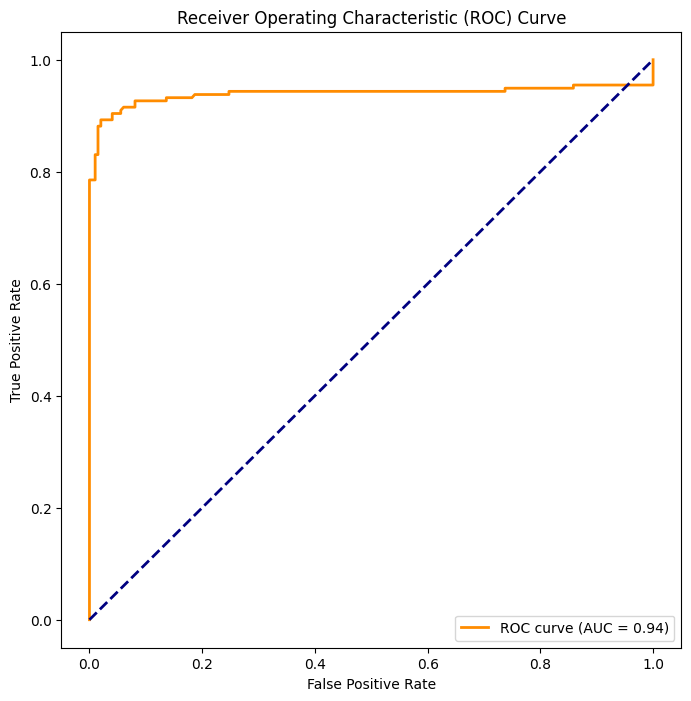

In [78]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming SVM is your SVM classifier and X_val_scaled, y_val are your validation set
y_val_pred_proba = SVM.predict_proba(X_val_scaled)[:, 1] if hasattr(SVM, 'predict_proba') else SVM.decision_function(X_val_scaled)

fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**4. KNN Model**

In [79]:
y_pred_KNN = knn.predict(X_val_scaled)

y_pred_original = label_encoder.inverse_transform(y_pred_KNN)
y_val_original = label_encoder.inverse_transform(y_val)

In [80]:
val_accuracy = accuracy_score(y_val_original, y_pred_original)
val_report = classification_report(y_val_original, y_pred_original)

print("Testing Set Accuracy:", val_accuracy)
print("Testing Set Classification Report:\n", val_report)

Testing Set Accuracy: 0.8346666666666667
Testing Set Classification Report:
               precision    recall  f1-score   support

Not Recurred       0.83      0.87      0.85       198
    Recurred       0.84      0.80      0.82       177

    accuracy                           0.83       375
   macro avg       0.84      0.83      0.83       375
weighted avg       0.84      0.83      0.83       375



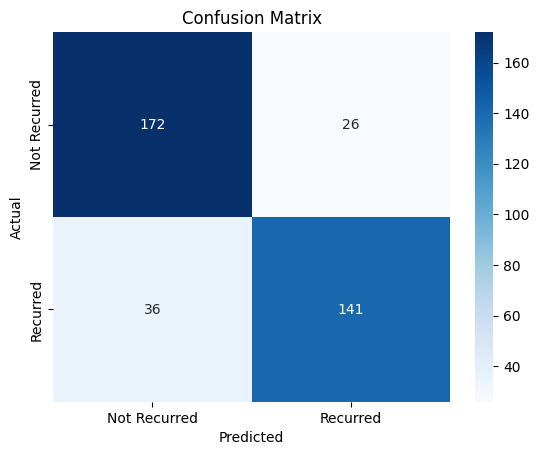

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val_original, y_pred_original)

class_labels = ['Not Recurred', 'Recurred']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

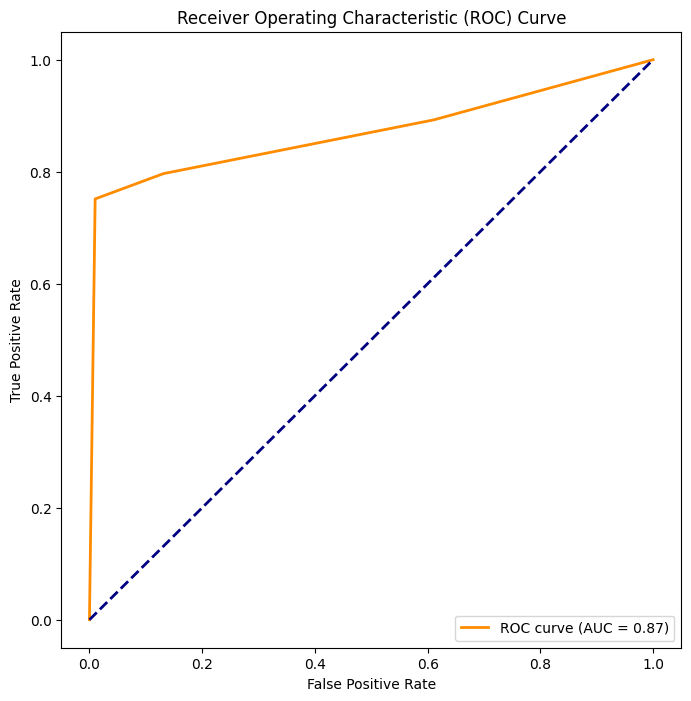

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = knn.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**5. NN Model**

In [83]:
y_pred_NN = model.predict(X_val_scaled)
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
val_report = classification_report(y_val, (y_pred_NN > 0.5).astype(int))

print(f"Validation Loss: {val_loss:.4f}")
print("Validation Set Accuracy:", val_accuracy)
print("Validation Set Classification Report:\n", val_report)

12/12 [==============================] - 0s 4ms/step - loss: 0.2455 - accuracy: 0.9200
Validation Loss: 0.2455
Validation Set Accuracy: 0.9200000166893005
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       198
           1       0.97      0.86      0.91       177

    accuracy                           0.92       375
   macro avg       0.93      0.92      0.92       375
weighted avg       0.92      0.92      0.92       375



12/12 [==============================] - 0s 2ms/step


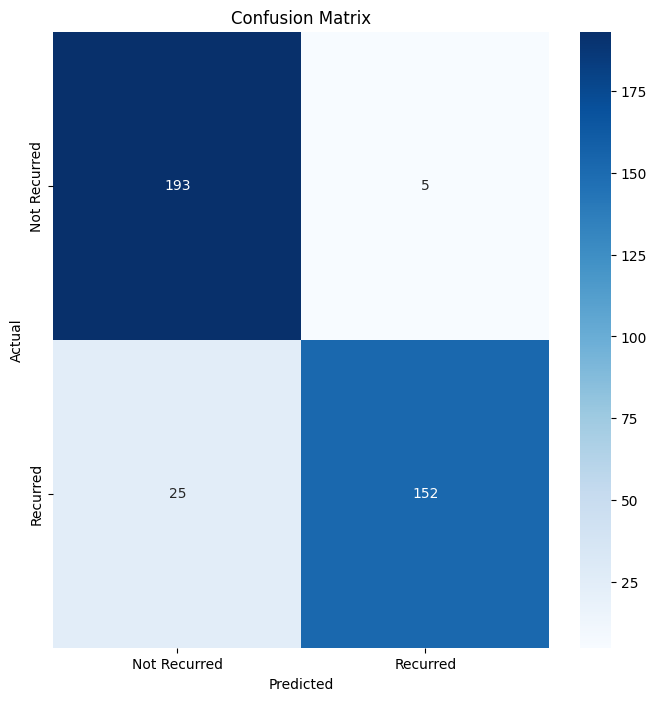

In [84]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_val_pred = (model.predict(X_val_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recurred', 'Recurred'], yticklabels=['Not Recurred', 'Recurred'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


12/12 [==============================] - 0s 2ms/step


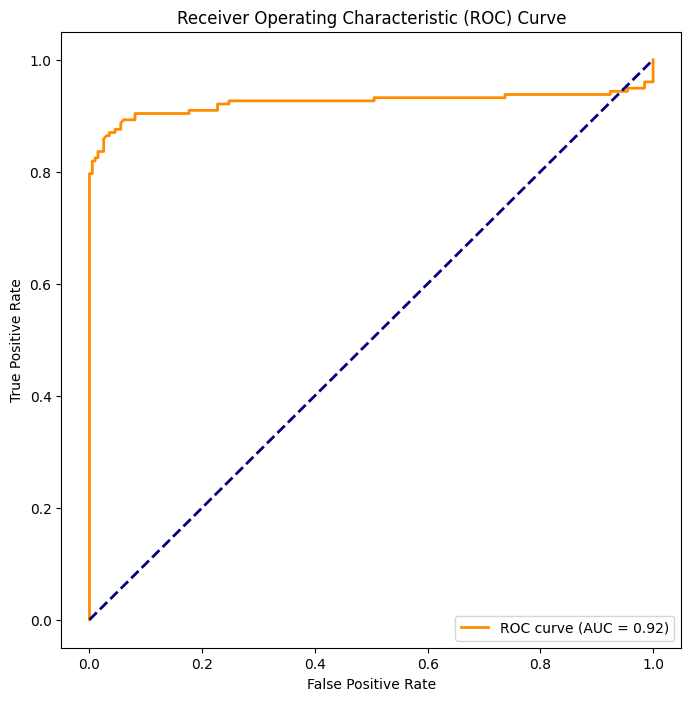

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_val_pred_proba = model.predict(X_val_scaled)[:, 0]
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




---



---



**ROC Combined**

12/12 [==============================] - 0s 2ms/step


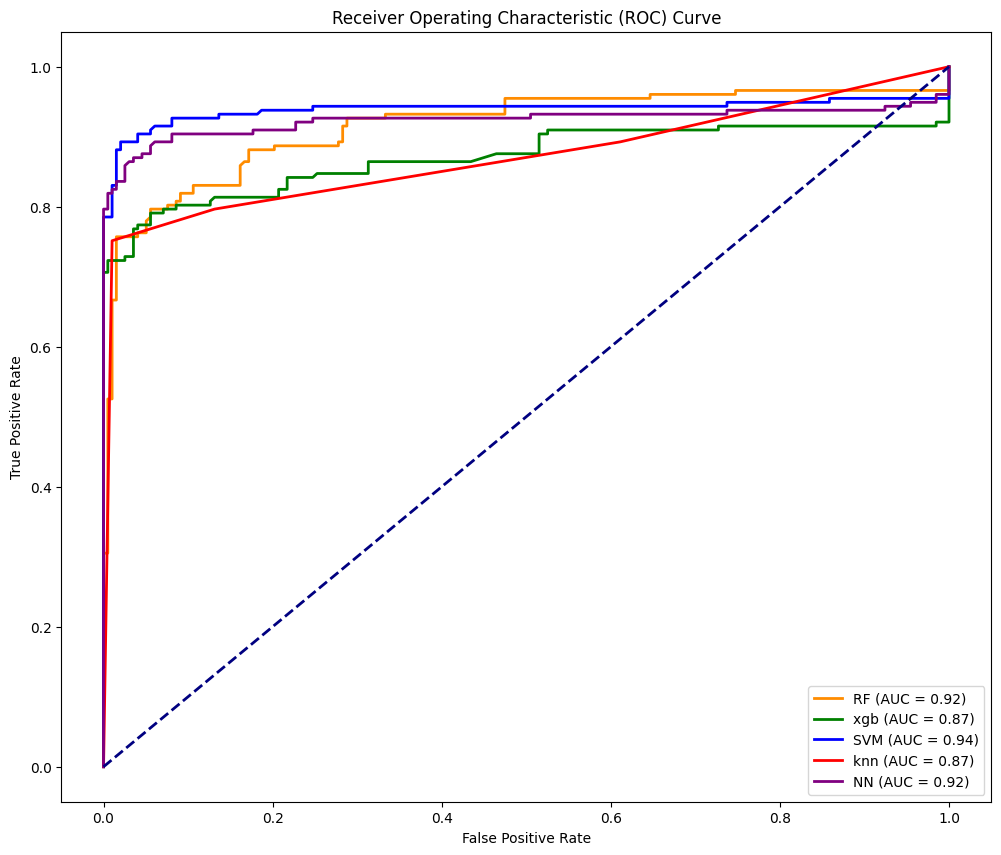

In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for clf
y_val_pred_proba_clf = clf.predict_proba(X_val_scaled)[:, 1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_val, y_val_pred_proba_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)


# Plot ROC curve for xgb
y_val_pred_proba_xgb = xgb.predict_proba(X_val_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_val_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve for SVM
y_val_pred_proba_svm = SVM.predict_proba(X_val_scaled)[:, 1] if hasattr(SVM, 'predict_proba') else SVM.decision_function(X_val_scaled)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, y_val_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for knn
y_val_pred_proba_knn = knn.predict_proba(X_val_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, y_val_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for model
y_val_pred_proba_model = model.predict(X_val_scaled)[:, 0]
fpr_model, tpr_model, thresholds_model = roc_curve(y_val, y_val_pred_proba_model)
roc_auc_model = auc(fpr_model, tpr_model)

# Combine all ROC curves in one plot
plt.figure(figsize=(12, 10))

plt.plot(fpr_clf, tpr_clf, color='darkorange', lw=2, label='RF (AUC = {:.2f})'.format(roc_auc_clf))
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='xgb (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svm))
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label='knn (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_model, tpr_model, color='purple', lw=2, label='NN (AUC = {:.2f})'.format(roc_auc_model))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Combined Confusion plot**

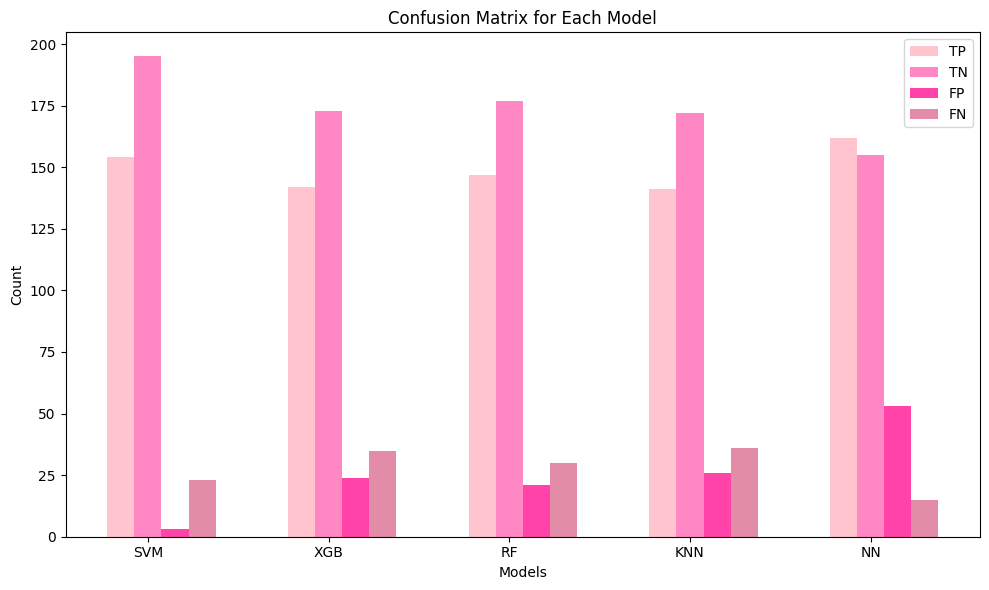

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['SVM', 'XGB', 'RF', 'KNN', 'NN']
metrics = ['TP', 'TN', 'FP', 'FN']
values = np.array([
    [154, 142, 147, 141, 162],
    [195, 173, 177, 172, 155],
    [3, 24, 21, 26, 53],
    [23, 35, 30, 36, 15]
])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.15
opacity = 0.8
colors = ['#FFB6C1', '#FF69B4', '#FF1493', '#DB7093']

for i, metric in enumerate(metrics):
    rects = ax.bar(np.arange(len(models)) + (i * bar_width), values[i], bar_width,
                    alpha=opacity, color=colors[i], label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Count')
ax.set_title('Confusion Matrix for Each Model')
ax.set_xticks(np.arange(len(models)) + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# **Combined evaluation metrics **

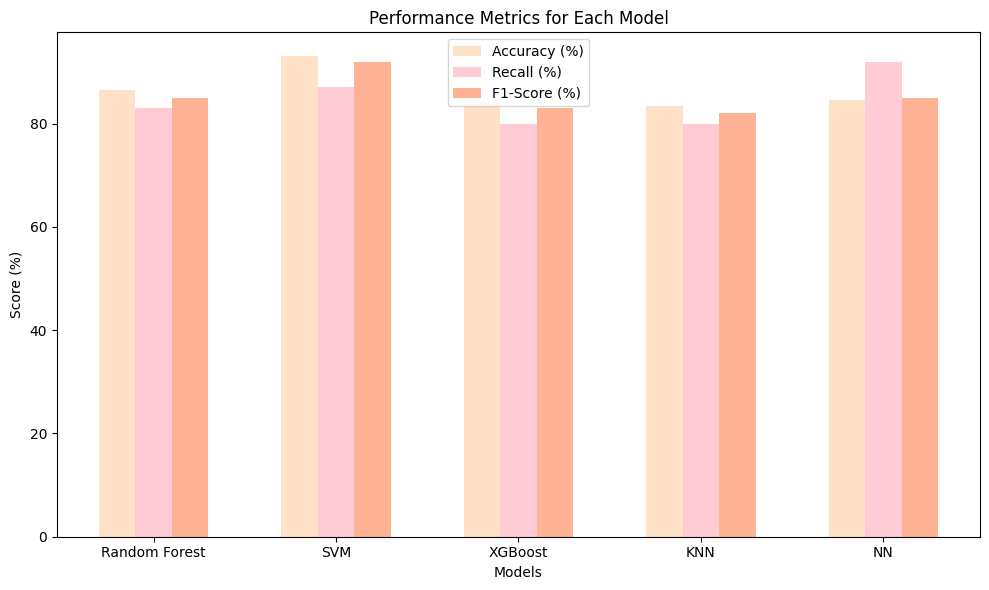

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'SVM', 'XGBoost', 'KNN', 'NN']
metrics = ['Accuracy (%)', 'Recall (%)', 'F1-Score (%)']
values = np.array([
    [86.4, 93, 84, 83.46, 84.53],
    [83, 87, 80, 80, 92],
    [85, 92, 83, 82, 85]
])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
opacity = 0.8
colors = ['#FFDAB9', '#FFC0CB', '#FFA07A']

for i, metric in enumerate(metrics):
    rects = ax.bar(np.arange(len(models)) + (i * bar_width), values[i], bar_width,
                    alpha=opacity, color=colors[i], label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Score (%)')
ax.set_title('Performance Metrics for Each Model')
ax.set_xticks(np.arange(len(models)) + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# **Save the predictions**

In [92]:
import numpy as np

# Assuming y_pred_RF, y_pred_XG, y_pred_SVM, y_pred_KNN, y_pred_NN are the predictions

# Save Random Forest predictions
np.save('y_pred_RF.npy', y_pred_RF)

# Save XGBoost predictions
np.save('y_pred_XG.npy', y_pred_XGB)

# Save SVM predictions
np.save('y_pred_SVM.npy', y_pred_SVM)

# Save KNN predictions
np.save('y_pred_KNN.npy', y_pred_KNN)

# Save Neural Network predictions
np.save('y_pred_NN.npy', y_pred_NN)

# **P-Value Test**

In [93]:
# Load predictions from files
y_pred_RF = np.load('y_pred_RF.npy')
y_pred_XG = np.load('y_pred_XG.npy')
y_pred_SVM = np.load('y_pred_SVM.npy')
y_pred_KNN = np.load('y_pred_KNN.npy')
y_pred_NN = np.load('y_pred_NN.npy')

In [94]:
Baheya_data = pd.read_csv('/content/merged_baheya.csv')
Baheya_data.head()

,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Grade,Histological Type,ER,PR,HER2,Tumor Location,Overall Survival Status (Month),Overall Survival Status,Recurrence Free Status (Month),Recurrence Free Status
0,Post,1,0,1,Breast Invasive Lobular Carcinoma,Positive,Positive,Negative,Left,48.0,Living,48.0,Not Recurred
1,Post,4,1,2,Breast Invasive Ductal Carcinoma,Positive,Negative,Negative,Left,76.0,Living,76.0,Recurred
2,Post,2,2,3,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,Right,47.0,Living,47.0,Not Recurred
3,Post,1,0,3,Breast Invasive Ductal Carcinoma,Positive,Positive,Negative,Left,69.0,Living,17.0,Recurred
4,Pre,2,1,3,Breast Invasive Ductal Carcinoma,Negative,Negative,Negative,Right,40.0,Deceased,18.0,Recurred


In [95]:
import numpy as np

Baheya_data['Recurrence Free Status'] = np.where(Baheya_data['Recurrence Free Status'] == 'Recurred', 1, 0)

# Extract the modified target column as an array
true_labels = Baheya_data['Recurrence Free Status'].values

# Print the modified array
print(true_labels)


[0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1
 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1]


In [96]:
print(y_pred_SVM)

[0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1]


# **Create contingency table**

# **RF**

In [97]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_RF):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_RF = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_RF)

Contingency Table:
[[147, 21], [30, 177]]


# **XGB**

In [98]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_XG):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_XGB = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_XGB)

Contingency Table:
[[142, 25], [35, 173]]


# **SVM**

In [99]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_SVM):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_SVM = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_SVM)

Contingency Table:
[[154, 3], [23, 195]]


# **KNN**

In [100]:
# Random forest

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_KNN):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_KNN = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_KNN)


Contingency Table:
[[141, 26], [36, 172]]


# **NN**

In [101]:
import numpy as np

# Assuming y_pred is the array of predictions from your NN model

# Convert probabilities to class labels using a threshold of 0.5
y_pred_NN = np.where(y_pred_NN >= 0.5, 1, 0)
# Flatten the predictions of the neural network model into a single list
y_pred_NN = y_pred_NN.flatten()

In [102]:
print(y_pred_NN)

[0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1
 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1]


In [103]:

# Initialize counts
a = b = c = d = 0

# Count instances
for true_label, prediction in zip(true_labels, y_pred_NN):
    if prediction == true_label == 1:
        a += 1
    elif prediction == 1 and true_label == 0:
        b += 1
    elif prediction == 0 and true_label == 1:
        c += 1
    elif prediction == true_label == 0:
        d += 1

# Create the contingency table
contingency_table_NN = [[a, b], [c, d]]

# Print the contingency table
print("Contingency Table:")
print(contingency_table_NN)


Contingency Table:
[[152, 5], [25, 193]]


# **mcnemar test**

In [104]:
from statsmodels.stats.contingency_tables import mcnemar

p_values = {}

# Calculate p-value for Random Forest model
p_value_rf = mcnemar(contingency_table_RF, exact=True).pvalue
p_values['Random Forest'] = p_value_rf

# Calculate p-value for XGBoost model
p_value_xgb = mcnemar(contingency_table_XGB, exact=True).pvalue
p_values['XGBoost'] = p_value_xgb

# Calculate p-value for SVM model
p_value_svm = mcnemar(contingency_table_SVM, exact=True).pvalue
p_values['SVM'] = p_value_svm

# Calculate p-value for KNN model
p_value_knn = mcnemar(contingency_table_KNN, exact=True).pvalue
p_values['KNN'] = p_value_knn

# Calculate p-value for NN model
p_value_NN = mcnemar(contingency_table_NN, exact=True).pvalue
p_values['NN'] = p_value_NN


# Print the p-values
for model, p_value in p_values.items():
    print(f"P-value for {model}:", p_value)


P-value for Random Forest: 0.2624375357110438
P-value for XGBoost: 0.2450608330229457
P-value for SVM: 8.797645568847656e-05
P-value for KNN: 0.25285439418811073
P-value for NN: 0.0003249142318964005


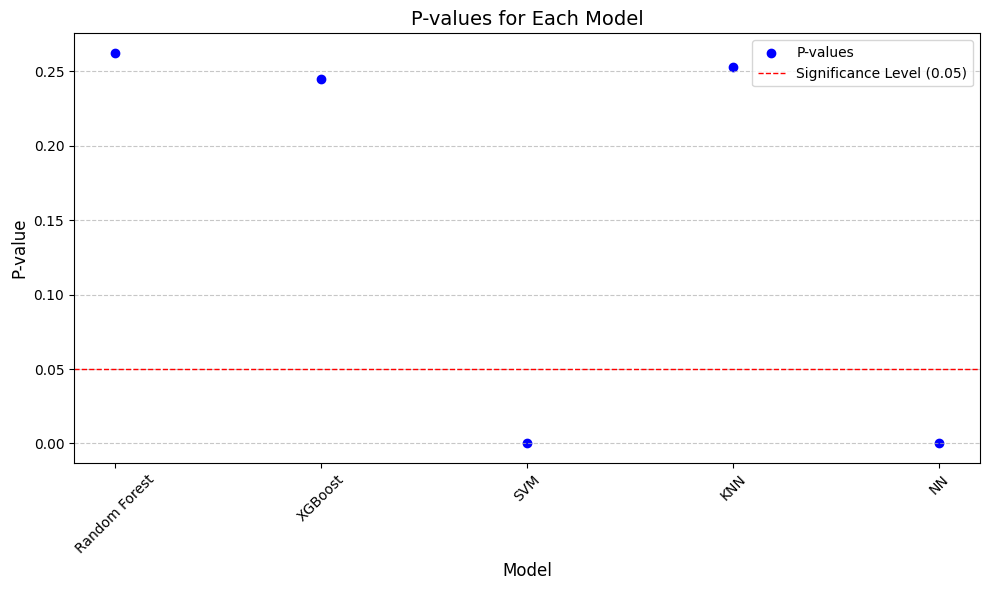

In [105]:
import matplotlib.pyplot as plt

# P-values for each model
p_values = {
    'Random Forest': 0.2624375357110438,
    'XGBoost': 0.2450608330229457,
    'SVM': 8.797645568847656e-05,
    'KNN': 0.25285439418811073,
    'NN': 0.0003249142318964005
}

# Create lists of model names and p-values
model_names = list(p_values.keys())
model_p_values = list(p_values.values())

# Plot each model's p-value
plt.figure(figsize=(10, 6))
plt.scatter(model_names, model_p_values, color='blue', label='P-values')
plt.xlabel('Model', fontsize=12)
plt.ylabel('P-value', fontsize=12)
plt.title('P-values for Each Model', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='red', linestyle='--', linewidth=1, label='Significance Level (0.05)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


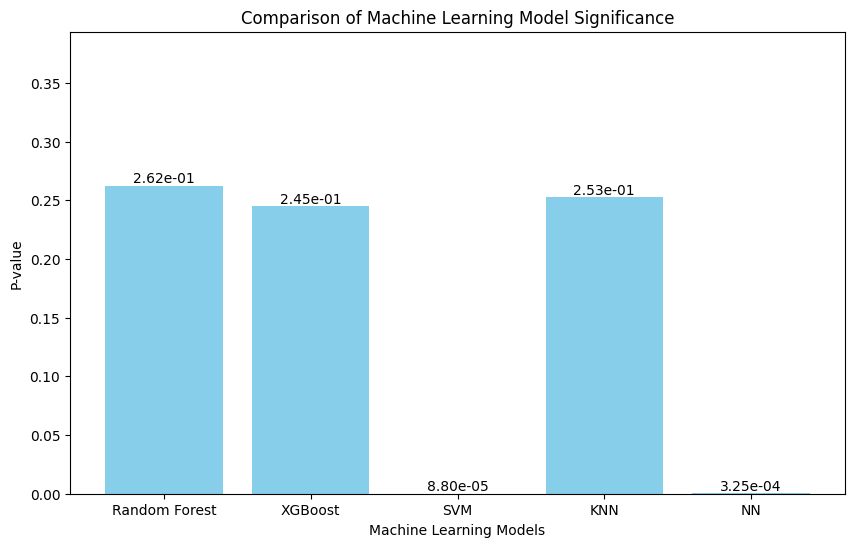

In [106]:
import matplotlib.pyplot as plt

# P-values for each machine learning model
p_values = {
    'Random Forest': 0.2624375357110438,
    'XGBoost': 0.2450608330229457,
    'SVM': 8.797645568847656e-05,
    'KNN': 0.25285439418811073,
    'NN': 0.0003249142318964005
}

# Correcting the infinite value representation for KNN (p-value of 1.0 results in a very small log10)
# We'll set it to a small value just above 0 for visualization purposes
adjusted_p_values = [p if p > 0 else 1e-100 for p in p_values.values()]

# Names of the machine learning models
model_names = list(p_values.keys())

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, adjusted_p_values, color='skyblue')

# Add the p-value labels above the bars
for bar, p_value in zip(bars, p_values.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{p_value:.2e}", ha='center', va='bottom')

# Set the title and axis labels
plt.title('Comparison of Machine Learning Model Significance')
plt.xlabel('Machine Learning Models')
plt.ylabel('P-value')
plt.ylim(0, max(adjusted_p_values) * 1.5)  # Set the limits of y-axis to allow space for lower values

# Show the plot
plt.show()


# **Wilcoxon test**

In [107]:
from scipy.stats import wilcoxon

# Model predictions for each model (binary predictions)
model_predictions = [y_pred_RF, y_pred_XG, y_pred_SVM, y_pred_KNN, y_pred_NN]
model_names = ['Random Forest', 'XGBoost', 'SVM', 'KNN', 'Neural Network']

# Check lengths before performing the test
if len(true_labels) != len(model_predictions[0]):
    raise ValueError("The number of true labels does not match the length of predictions.")

# Perform Wilcoxon signed-rank test for each model
for model_name, predictions in zip(model_names, model_predictions):
    statistic, p_value = wilcoxon(true_labels, predictions)
    print(f"Model: {model_name}")
    print(f"W-statistic: {statistic}")
    print(f"P-value: {p_value}")

Model: Random Forest
W-statistic: 546.0
P-value: 0.20757844233562417
Model: XGBoost
W-statistic: 762.5
P-value: 0.19670560245894686
Model: SVM
W-statistic: 40.5
P-value: 8.76994237559024e-05
Model: KNN
W-statistic: 819.0
P-value: 0.2040841777655732
Model: Neural Network
W-statistic: 77.5
P-value: 0.0002607296328553162


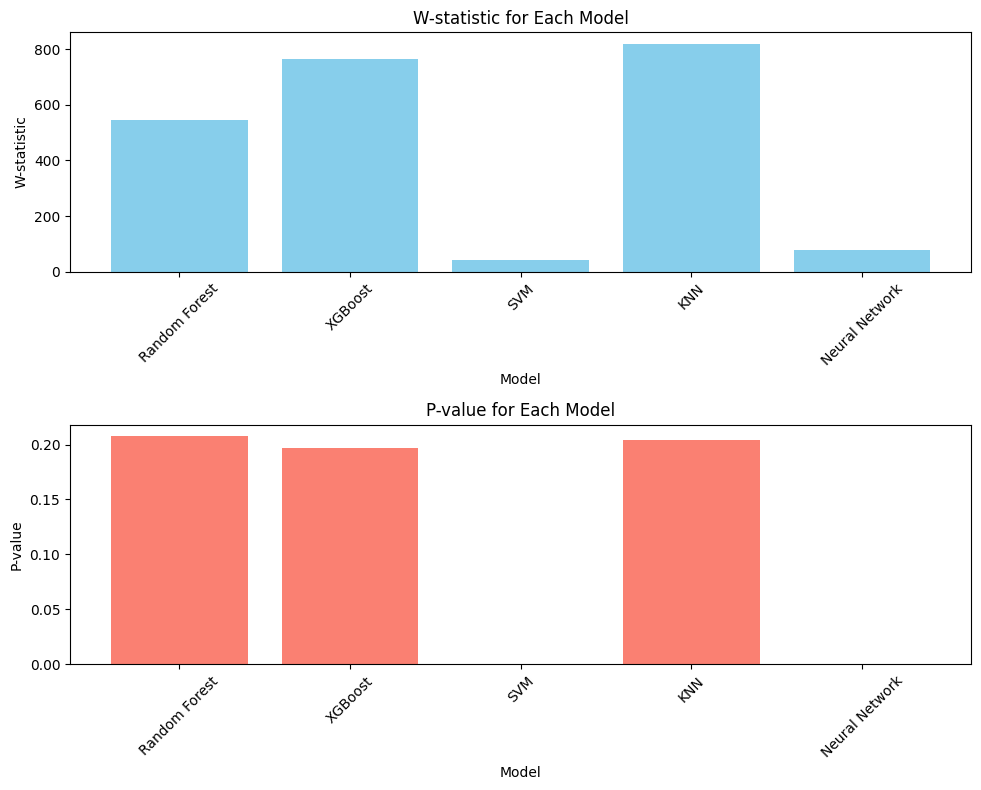

In [108]:
import matplotlib.pyplot as plt

# Updated Data
models = ['Random Forest', 'XGBoost', 'SVM', 'KNN', 'Neural Network']
w_statistics = [546.0, 762.5, 40.5, 819.0, 77.5]
p_values = [0.20757844233562417, 0.19670560245894686, 8.76994237559024e-05, 0.2040841777655732, 0.0002607296328553162]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot W-statistics
axes[0].bar(models, w_statistics, color='skyblue')
axes[0].set_title('W-statistic for Each Model')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('W-statistic')

# Plot p-values
axes[1].bar(models, p_values, color='salmon')
axes[1].set_title('P-value for Each Model')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('P-value')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
